In [9]:
import pandas as pd
import numpy as np
from numpy import pi
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
# Helper functions
def F_peak(E, w):
    """Convert pulse energy [J] and beam waist [cm] to peak fluence [J/cm2]"""
    return (2*E)/(pi * w**2)

def E(F, w):
    """Convert fluence to pulse energy"""
    return F * pi * w**2 / 2

def F_avg(E, w):
    """Convert pulse energy [J] and beam waist [cm] to average fluence [J/cm2]"""
    return (E)/(pi * w**2)

# Fluence calculations

In [4]:
w0 = 220E-4/2  # beam waist (cm)
print('Min = {:g} and Max = {:g} J/cm2'.format(F_avg(E=20E-6, w=w0), F_avg(E=2E-3, w=w0)))

Min = 0.0526132 and Max = 5.26132 J/cm2


# Beam through aperture at lens focal plane

In [5]:
from scipy.special import j0
from scipy.integrate import quad

# Energy density of a truncated Gaussian beam at the focal plane of the objective lens
# REF: Femtosecond laser ablation properties of borosilicate glass, Yakar
def F(r, w, f, lam, a, E):
    k = (2 * pi * w) / ( f * lam)
    
    def func(rho, k, r):
        return rho * np.exp(-rho**2) * j0(k*r*rho)
    
    integral = quad(func, 0, a/w, args=(k, r))[0] **2
    
    return (2*E*k**2/pi) * integral

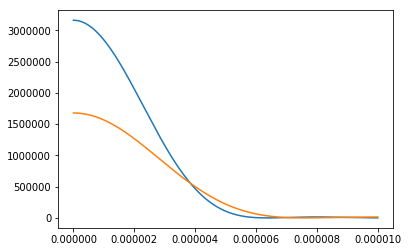

In [6]:
w = 7E-3 / 2
f = 40E-3
lam = 780E-9
a = 7E-3 / 2
E = 100E-6

r = np.linspace(0, 10E-6, num=1000)
vF = np.vectorize(F)
y = vF(r, w, f, lam, a, E)

fig, ax = plt.subplots()
ax.plot(r, y)

a = 5.5E-3/ 2
y2 = vF(r, w, f, lam, a, E)
ax.plot(r, y2)

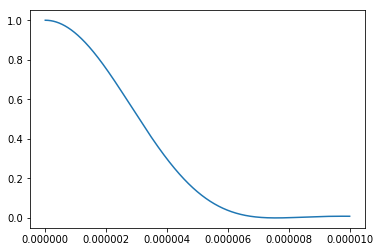

In [7]:
fig, ax = plt.subplots()
ax.plot(r, y2/max(y2))

# Gaussian beam radius as a function of distance from the focus

https://www.edmundoptics.com/resources/tech-tools/gaussian-beams/

http://www.colorado.edu/physics/phys4510/phys4510_fa05/Chapter5.pdf

To calculate the Beam Waist, w0 (mm) - http://www.calctool.org/CALC/phys/optics/f_NA

<IPython.core.display.Javascript object>


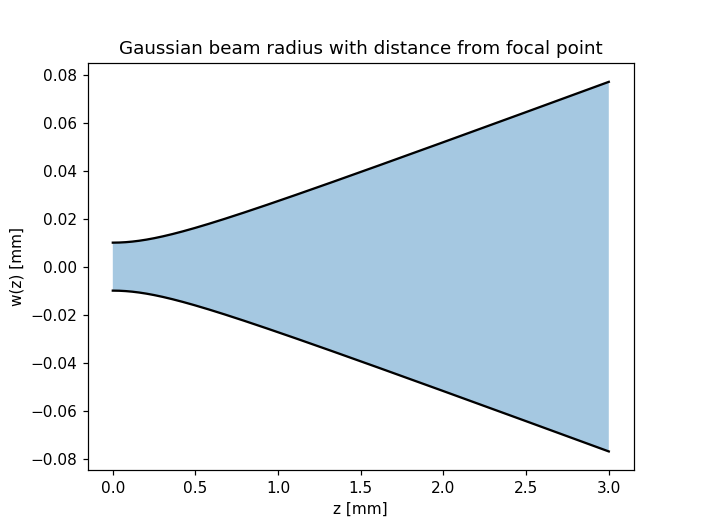

Text(0,0.5,'w(z) [mm]')

In [13]:
def z_R(w0, lam):
    """Rayleigh Range, z_R (mm)"""
    return pi * w0**2 / (lam*1E-6)

def w(z, w0, z_R):
    """Half Beam Diameter, w(z) (mm)"""
    return w0 * np.sqrt(1 + (z/z_R)**2)

def theta(lam, w0):
    """Half Angle Divergence, θ (mrad)"""
    return lam*1E-3 / (pi*w0)

# Beam Waist, w0 (mm)
w0 = 20E-3 / 2
# Wavelength, λ (nm)
lam = 800
# Axial Distance, z (mm)
z = np.linspace(0, 3, num=1000)

# Calculations
y = w(z, w0, z_R(w0, lam))

fig, ax = plt.subplots()
ax.plot(z, y, z, -y, color='black')
ax.fill_between(z, y, -y, alpha=0.4)
ax.set_title('Gaussian beam radius with distance from focal point')
ax.set_xlabel('z [mm]')
ax.set_ylabel('w(z) [mm]')

In [36]:
z = 900E-3/2
print('Gaussian waist size {:} um'.format(w(z, w0, z_R(w0, lam)) * 2E3))

Gaussian waist size 30.417906173862114 um


In [38]:
300E-3/2

0.15

# B11 System

In [4]:
# Spot size (major axis)
D = 75  # minor axis diameter (normal to beam)
AOI = 70  # degrees

r_minor = D / 2
r_major = 0.5 * D / np.sin(np.deg2rad(90-AOI))

In [20]:
# Fluence in major and minor axis
E = 200E-6
print('Fluence in major {:.3g} J/cm2 and minor {:.3g} J/cm2 axis'.format(F_avg(E, r_major*1E-4), F_avg(E, r_minor*1E-4)))

Fluence in major 0.53 J/cm2 and minor 4.53 J/cm2 axis


In [12]:
# Pulser per spot/area
v = 1.5  # mm/s
f = 1E3  # Hz
D = 75E-3  # mm

# Average pulses per area = length drawn per sec / rastering speed
f*D / v  # mm/s

50.0